In [3]:
import pandas as pd #For dataset loading and manipulation
import numpy as np #For arrays operation
from collections import Counter #To count labels inside of lists

In [4]:
#Load the hr dataset, change its path.
df = pd.read_pickle("/kaggle/input/hr-pickle/hr.pickle")

,ts,name,faults
0,"[[0.000167964, -5.34659e-05, 1.28447e-05, 9.03069e-05, -0.000565384, -0.00056474, -0.000842469, -0.001499359, -0.000834435, -0.000570648, -0.000837429, -1.67616e-05, 4.8816e-05, -0.00079084, -0.000327014, 3.42609e-05, -0.000158954, 9.86135e-05, -0.000336946, -0.001150842, -0.001238287, -0.000548212, -0.000204669, -0.000194872, 0.00021634, -0.000177881, -0.000240321, 0.000508126, 0.000178436, 9.75356e-05, 0.001259568, 0.001333685, 1.37848e-05, 6.20133e-05, 0.000550741, -3.99073e-05, 4.55635e-05, 1.13047e-05, -0.00051353, -0.000503862, -0.000648465, -0.000318243, 0.000249337, 3.15472e-05, 0....",9.1120 C Hot Water Pump,"[[BearingFault, motor], [XC, machine], [BearingWear, machine], [Misalignment, machine]]"
1,"[[0.009780156, 0.014624815, 0.019440233, 0.020658184, 0.017967604, 0.009174936, 0.001417043, -0.001939103, -0.00805072, -0.011843533, -0.014219049, -0.019627029, -0.021229118, -0.020917868, -0.022044855, -0.021385624, -0.016861956, -0.009500967, -0.00119977, 0.004539211, 0.005155102, 0.005214135, 0.006464893, 0.007627514, 0.011241971, 0.016432319, 0.017511789, 0.015600145, 0.017484137, 0.021720344, 0.024232787, 0.025413666, 0.024583384, 0.021788494, 0.021086544, 0.022498487, 0.022263324, 0.017916767, 0.008043157, -0.00031351, -0.006809025, -0.015653446, -0.021165667, -0.026619506, -0.03255...",Air RecFan 1.12302,"[[Looseness, machine], [Misalignment, machine], [BearingFault, motor], [BearingWear, motor], [AirGap, motor], [BearingWear, machine]]"
2,"[[0.001560547, 0.001073043, -2.44838e-05, -0.001611954, -0.002866695, -0.0032351, -0.002688012, -0.001831471, -0.001038321, -0.000445179, -0.000420284, -0.000377106, 0.000294825, 0.001203177, 0.002000931, 0.002360647, 0.001911788, 0.001293219, 0.001173605, 0.000718877, -5.72018e-05, -0.000616387, -0.001105821, -0.000674252, 0.000405587, 0.00125989, 0.001628663, 0.001055345, 0.000109512, -0.000776519, -0.001118798, -0.000849708, -0.000764858, -0.000954164, -0.001715623, -0.002898189, -0.003971656, -0.004481944, -0.00390594, -0.002964862, -0.002191588, -0.00147033, -0.001107024, -0.000715352...",Air RecFan 1.12302,"[[Looseness, machine], [Misalignment, machine], [BearingFault, motor], [AirGap, motor], [BearingFault, machine], [BearingWear, machine]]"
3,"[[-0.002804407, -0.001306111, 0.001502491, 0.003827181, 0.003568893, 0.001816155, 0.000100319, -0.000951765, -0.001203227, -0.002330872, -0.003806574, -0.004890437, -0.004978394, -0.00343315, -0.002100229, -0.00064759, 0.001069252, 0.002145311, 0.003457275, 0.003849629, 0.003005024, 0.002946228, 0.003512882, 0.00359261, 0.002664904, -0.000128839, -0.003329946, -0.004664527, -0.004357799, -0.003042399, -0.002107257, -0.001808332, -0.000831065, 0.000902475, 0.003257674, 0.00510972, 0.005467418, 0.004866214, 0.003733039, 0.002247958, 0.000843002, -0.000626744, -0.002489772, -0.003918503, -0.0...",Air RecFan 1.12402A,"[[Looseness, machine], [Misalignment, machine], [Coupling, machine], [BearingFault, motor], [XC, motor], [BearingWear, motor], [XC, machine], [BearingWear, machine], [BearingFault, machine]]"
4,"[[0.000500389, 0.00026631, -6.22153e-05, -0.000142476, -4.75691e-05, 0.0001218, 0.000371263, 0.000299236, 0.000269244, 0.00019962, -0.000242869, -0.000639186, -0.000770352, -0.000477812, 5.89802e-05, 0.000604822, 0.001018487, 0.000755639, 0.000197441, -0.000204729, -0.000451642, -0.000361926, -0.000120139, 0.000474334, 0.001061049, 0.001265778, 0.001449682, 0.001595437, 0.001534811, 0.001075541, 0.000546414, 4.71522e-05, -0.000446577, -0.000834653, -0.001187756, -0.001398703, -0.001708601, -0.00187206, -0.001517598, -0.00098703, -0.000616981, -0.000478472, -0.000623157, -0.000817949, -0.00...",Vacuum Pump 5.1302,"[[Misalignment, machine], [Looseness, machine], [BearingFault, motor], [BearingFault, machine], [AirGap, motor]]"


In [6]:
#Create query lists that we will use to get the faults we want from the dataframe.
###### Change the names in faults_to_take if you want to include/exclude faults or experiment with other faults ######
faults_to_take = ["BearingFault", "BearingWear", "BearingLubrication", "Flow"]
locations = ["machine", "motor"]
query_strings = []
for fault in faults_to_take:
    for location in locations:
        query_strings.append([fault, location])
query_strings

[['BearingFault', 'machine'],
 ['BearingFault', 'motor'],
 ['BearingWear', 'machine'],
 ['BearingWear', 'motor'],
 ['BearingLubrication', 'machine'],
 ['BearingLubrication', 'motor'],
 ['Flow', 'machine'],
 ['Flow', 'motor']]

In [8]:
#The following are dataframe preprocessing steps to create the arrays we will use in the training.
df["motor_bearing"] = 0
df["machine_bearing"] = 0

for index, row in df.iterrows():
    faults = row["faults"]
    
    for query in query_strings:
        if query in faults:
            if "motor" in query:
                df.at[index, "motor_bearing"] = 1

            elif "machine" in query:
                df.at[index, "machine_bearing"] = 1

In [9]:
#ts_list contains the actual time series values, labels_list is a list of lists, each sublist has two values [motor_label, machine_label]
ts_list = df['ts'].to_list()
labels_list = df.apply(lambda row: [row['motor_bearing'], row['machine_bearing']], axis = 1)

In [11]:
#Separate each channel with its own label!
#First six channels which are the motor ones, will take the first element in each sublist of labels_list and vice versa with the other channels which are the machine's
ts_exploded = []
labels_exploded = []

for ts, label in zip(ts_list, labels_list):
    for i in range(len(ts)):
        ts_exploded.append(ts[i])
        if i < 6:
            labels_exploded.append(label[0])
        else:
            labels_exploded.append(label[1])

In [14]:
#Rename the lists for more clarity
ts_list = ts_exploded
labels_list = labels_exploded

In [15]:
#FFT and Sliding window functions.

#Note: DON'T USE FFT
def GetFFT(ts):
        return np.abs(np.fft.rfft(ts * np.hanning(len(ts))))[:-1] * 2

def slide_ts(time_series, label, window_length=1024, overlap = 0, fft = False):

    time_series = time_series[~np.isnan(time_series)]

    windowed_ts_list = []
    windowed_labels = []

    step_size = int(window_length * (1 - overlap))

    for i in range(0, len(time_series) - window_length + 1, step_size):
        start = i 
        end = i + window_length
        if fft == True:
            windowed_ts_list.append(GetFFT(time_series[start:end]))
        else:
            windowed_ts_list.append(time_series[start:end])
             
        windowed_labels.append(label)

    return (np.array(windowed_ts_list), np.array(windowed_labels))

In [17]:
#Import tsai
from tsai.all import *
computer_setup()

os              : Linux-5.15.133+-x86_64-with-glibc2.31
python          : 3.10.13
tsai            : 0.3.9
fastai          : 2.7.13
fastcore        : 1.5.29
torch           : 2.1.2
device          : 2 gpus (['Tesla T4', 'Tesla T4'])
cpu cores       : 2
threads per cpu : 2
RAM             : 31.36 GB
GPU memory      : [15.0, 15.0] GB


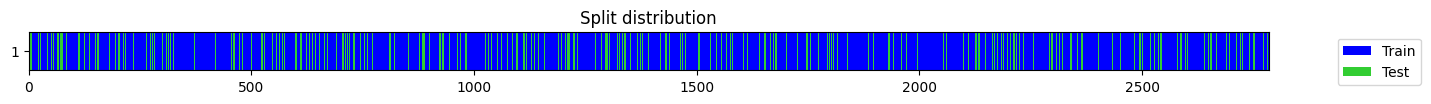

((#2228) [844,1596,440,503,2365,2192,1929,2563,2112,1066...],
 (#556) [723,1080,633,620,30,154,1566,1418,2542,1676...])

In [18]:
#Shuffle and do training and testing splitting.
#REMEMBER! Make sure to NOT include two windows of the same time series in training and testing simultaneously.
splits = get_splits(np.array(labels_list), valid_size=0.2, random_state=23, shuffle=True)
splits

In [20]:
train_sample_indices = list(splits[0])
test_sample_indices = list(splits[1])

In [21]:
#Now that we made each time series in its container (train, test), we can now apply the sliding window safely.

window_length = 1024//4
overlap = 0.2



fft = False #Always make it False... for now.

X_train = []
y_train = []
X_test = []
y_test = []

for index in train_sample_indices:
    ts = ts_list[index]
    label = labels_list[index]
    data_pairs = slide_ts(ts, label=label, window_length=window_length, overlap=overlap, fft=fft)
    X_train.append(data_pairs[0])
    y_train.append(data_pairs[1])

# Iterate over the test samples
for index in test_sample_indices:
    ts = ts_list[index]
    label = labels_list[index]
    data_pairs = slide_ts(ts, label=label, window_length=window_length, overlap=overlap, fft=fft)
    X_test.append(data_pairs[0])
    y_test.append(data_pairs[1])

# Concatenate the train and test sets
X_train_arr = np.concatenate(X_train, axis=0)
y_train_arr = np.concatenate(y_train, axis=0)
X_test_arr = np.concatenate(X_test, axis=0)
y_test_arr = np.concatenate(y_test, axis=0)

In [23]:
#See how they got unbalanced again after applying windowing?
#Let's apply undersampling on them, the following undersampling library not just removes samples randomly, but remove them in an intelligent way, and to not remove important samples.
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=1, n_neighbors=5)

In [24]:
# Now, apply the fit_resample method
X_train_arr, y_train_arr = undersample.fit_resample(X_train_arr, y_train_arr)

In [26]:
X, y, splits = combine_split_data([X_train_arr, X_test_arr], [y_train_arr, y_test_arr])

In [27]:
tfms  = [None, [TSStandardize(by_var=True), Categorize()]]
batch_tfms = [TSStandardize(by_sample=True)]
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, shuffle_train=True, batch_tfms=batch_tfms, bs=[64,256])

##### TASK 1 #####
Callbacks: Stop the training of the model based on a given criteria.
Example: Stop training when the {metric} starts to decrease for {x} iterations

##### TASK 3 #####
Experiment with different variations of CNN (FCN), resnet, LSTM, LSTM_FCN, InceptionTime, Transofrmers (TST)

In [29]:
from   fastai.callback.all import *

In [45]:
model = TST(c_in=dls.vars, c_out=dls.c, seq_len=dls.len)
callbacks=[
#     EarlyStoppingCallback(monitor='f1_score', comp=np.greater , patience=3),

           SaveModelCallback(monitor='f1_score', comp=np.greater, fname='bestmodel', every_epoch=False),
           PredictionDynamics()]

# earlystopping = EarlyStoppingCallback(monitor='f1', comp=np.greater, patience=3)
# savemodel = SaveModel(monitor='valid_loss')
# savebestmodel = SaveModelCallback(monitor='f1_score', fname='best-model')

learn = Learner(dls, model, metrics=[accuracy, Precision(), Recall(), F1Score()])

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.712419,0.701576,0.502884,0.532310,0.478642,0.504051,01:19
1,0.706891,0.701647,0.500835,0.548645,0.305767,0.392686,01:20
2,0.695015,0.706331,0.502581,0.610497,0.158924,0.252197,01:20
3,0.665032,0.652932,0.623956,0.667057,0.573997,0.617038,01:20
4,0.652619,0.652996,0.624715,0.606420,0.823242,0.698389,01:20
5,0.658902,0.644871,0.632382,0.619750,0.785273,0.692762,01:20
6,0.645153,0.658314,0.624412,0.602894,0.844815,0.703642,01:20
7,0.646270,0.648016,0.630864,0.612656,0.817345,0.700351,01:20
8,0.639253,0.642403,0.637771,0.624671,0.785848,0.696051,01:20
9,0.636747,0.642328,0.637695,0.622307,0.797641,0.699149,01:20


Better model found at epoch 0 with f1_score value: 0.5040514956455888.


,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score
14,0.644255,0.642973,0.63724,0.62027,0.806271,0.701144


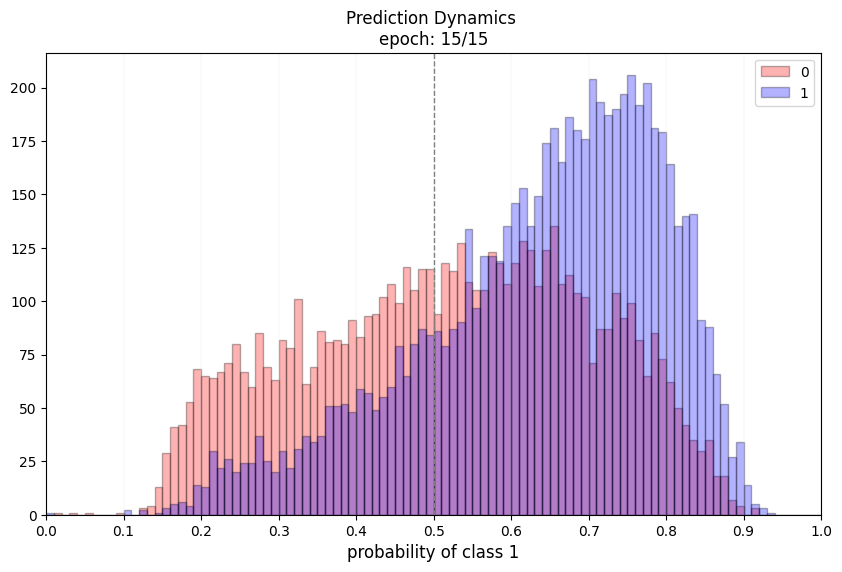

Better model found at epoch 3 with f1_score value: 0.6170377241805813.
Better model found at epoch 4 with f1_score value: 0.6983894582723281.
Better model found at epoch 6 with f1_score value: 0.7036415908001917.
Better model found at epoch 11 with f1_score value: 0.7047270509301616.


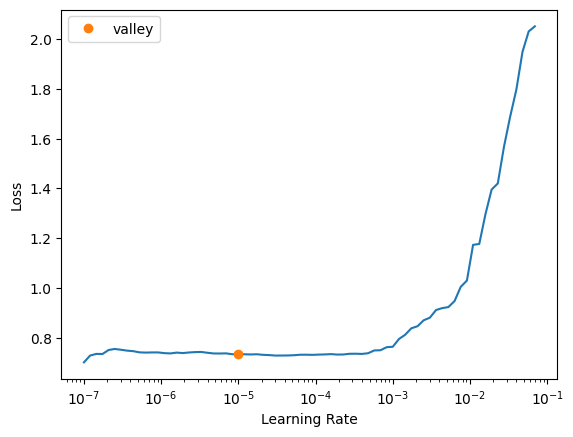

In [32]:
learn.fit_one_cycle(15, lr_max=learn.lr_find(), cbs=callbacks)

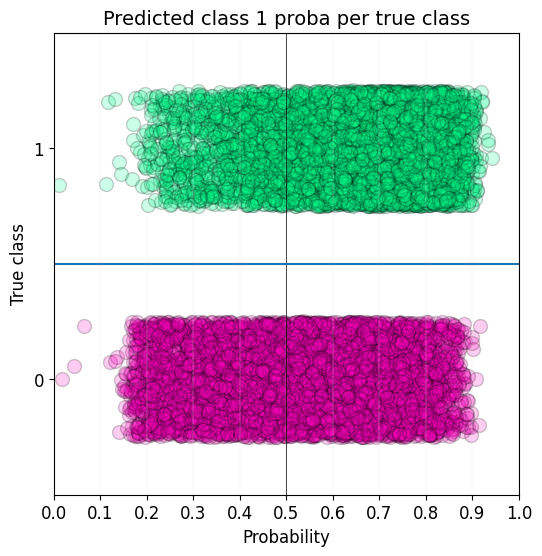

In [33]:
learn.show_probas()

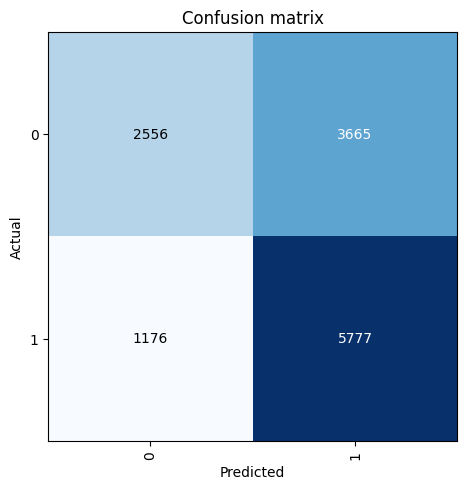

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [35]:
valid_dl = dls.valid
valid_probas, valid_targets, valid_preds = learn.get_preds(dl=valid_dl, with_decoded=True)
valid_probas, valid_targets, valid_preds

(tensor([[0.6824, 0.3176],
         [0.6303, 0.3697],
         [0.6478, 0.3522],
         ...,
         [0.1674, 0.8326],
         [0.1996, 0.8004],
         [0.2344, 0.7656]]),
 tensor([0, 0, 0,  ..., 1, 1, 1]),
 tensor([0, 0, 0,  ..., 1, 1, 1]))

In [36]:
positive_probs = valid_probas[:, 1]

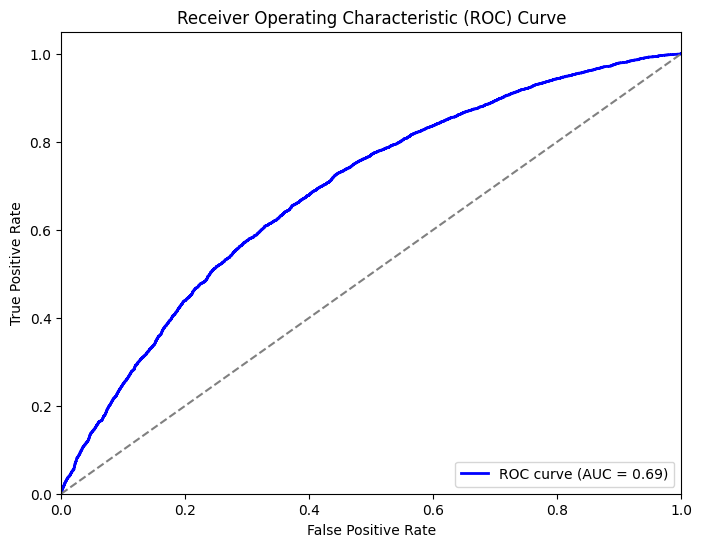

In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


#Draw ROC curve to help us adjust the threshold to a better value.
fpr, tpr, thresholds = roc_curve(valid_targets, positive_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [38]:
#We can calculate the optimum value for the threshold from the following code:
youden_index = tpr - fpr
optimal_threshold = thresholds[np.argmax(youden_index)]
print("Optimal threshold:", optimal_threshold)

Optimal threshold: 0.57743156


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
positive_probs = valid_probas[:, 1]

threshold = optimal_threshold ###Adjust threshold if required. Use the optimal one found in the previous cell.

valid_preds_adjusted = (positive_probs > threshold).long()

accuracy = accuracy_score(valid_targets, valid_preds_adjusted)
precision = precision_score(valid_targets, valid_preds_adjusted)
recall = recall_score(valid_targets, valid_preds_adjusted)
f1 = f1_score(valid_targets, valid_preds_adjusted)

print("Adjusted Threshold Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Adjusted Threshold Metrics:
Accuracy: 0.6460
Precision: 0.6465
Recall: 0.7263
F1 Score: 0.6841


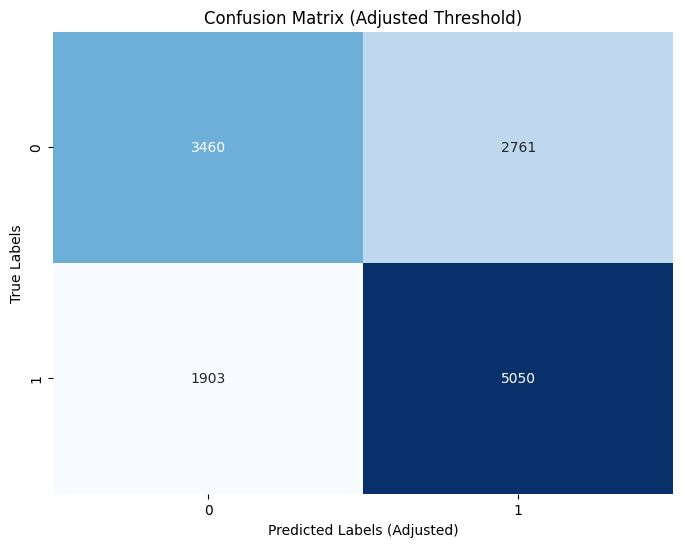

In [40]:
#Plot confusion matrix after adjsuting the threshold
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(valid_targets, valid_preds_adjusted)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels (Adjusted)')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Adjusted Threshold)')
plt.show()

Hyperparameter optimization.
https://github.com/timeseriesAI/tsai/discussions/138

Task 2 - Define the hyperparameters of the model, and do an optimzation study on them.

In [35]:
import optuna
from optuna.integration import FastAIPruningCallback

num_epochs = 5
num_optuna_trials = 100
    
def objective(trial:optuna.Trial):
    # Define search space here. Supported search space are 
    num_filters = trial.suggest_categorical('num_filters', [32, 64, 96, 128]) 
    dropout_rate = trial.suggest_float("dropout_rate", 0.0, 1.0)

    model = InceptionTimePlus(dls.vars, dls.c, nf=num_filters, fc_dropout=dropout_rate)
    learn = Learner(dls, model, metrics=[accuracy, Precision(), Recall(), F1Score()])
    learn.fit_one_cycle(num_epochs, lr_max=learn.lr_find())
            
    # return the valid_loss - learn.recorder.values returns [[train_loss, valid_loss, acc]]
    return learn.recorder.values[-1][1]

In [ ]:
study = optuna.create_study(direction='minimize', pruner=optuna.pruners.HyperbandPruner())
study.optimize(objective, n_trials=num_optuna_trials, show_progress_bar=True)

[I 2024-02-17 14:24:58,471] A new study created in memory with name: no-name-e9fbba1e-13e7-418a-ba73-a3a6eb665cdb


  0%|          | 0/100 [00:00<?, ?it/s]

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.594557,0.754852,0.604524,0.581532,0.894003,0.704682,02:47
1,0.553229,0.562598,0.710263,0.802352,0.598447,0.685559,02:47
2,0.508565,0.571477,0.714286,0.780969,0.637423,0.701932,02:47
3,0.459830,0.565046,0.725824,0.730001,0.762549,0.745920,02:47
4,0.429482,0.566314,0.738424,0.759585,0.737955,0.748614,02:47


[I 2024-02-17 14:39:15,442] Trial 0 finished with value: 0.5663142800331116 and parameters: {'num_filters': 128, 'dropout_rate': 0.8836352618853918}. Best is trial 0 with value: 0.5663142800331116.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.551266,0.603935,0.694246,0.828873,0.530131,0.646667,02:47
1,0.461726,0.579533,0.720890,0.709195,0.798648,0.751268,02:47
2,0.366086,0.622318,0.715652,0.699913,0.807421,0.749833,02:47
3,0.275475,0.598039,0.746470,0.777880,0.727312,0.751747,02:47
4,0.226057,0.593195,0.752998,0.759725,0.778081,0.768794,02:47


[I 2024-02-17 14:53:31,967] Trial 1 finished with value: 0.593194842338562 and parameters: {'num_filters': 128, 'dropout_rate': 0.5107715809067829}. Best is trial 0 with value: 0.5663142800331116.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.600710,0.580723,0.693943,0.806377,0.552855,0.655973,01:58
1,0.568680,0.565385,0.720055,0.755038,0.695096,0.723828,01:58
2,0.508549,0.589431,0.725520,0.712035,0.805839,0.756038,01:58
3,0.454207,0.573154,0.731896,0.770606,0.700561,0.733916,01:58
4,0.442106,0.559570,0.740398,0.769078,0.726161,0.747004,01:57


[I 2024-02-17 15:03:36,120] Trial 2 finished with value: 0.5595698356628418 and parameters: {'num_filters': 96, 'dropout_rate': 0.8907074180759657}. Best is trial 2 with value: 0.5595698356628418.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.745987,0.681852,0.639821,0.691467,0.573422,0.626936,00:49
1,0.711670,0.670203,0.613329,0.774919,0.376816,0.507064,00:49
2,0.677470,0.618874,0.700167,0.695177,0.769164,0.730302,00:49
3,0.658028,0.613000,0.703886,0.797698,0.588091,0.677043,00:49
4,0.646248,0.604251,0.715804,0.796965,0.619301,0.696989,00:49


[I 2024-02-17 15:07:48,683] Trial 3 finished with value: 0.6042512655258179 and parameters: {'num_filters': 64, 'dropout_rate': 0.9958850585439109}. Best is trial 2 with value: 0.5595698356628418.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.559446,0.566982,0.729771,0.725628,0.784697,0.754008,00:27
1,0.467943,0.543019,0.739639,0.754736,0.750611,0.752668,00:27
2,0.394954,0.561441,0.731441,0.791233,0.667194,0.723939,00:27
3,0.316361,0.565469,0.748899,0.789700,0.714512,0.750227,00:27
4,0.255981,0.581189,0.752543,0.767183,0.762549,0.764859,00:27


[I 2024-02-17 15:10:10,685] Trial 4 finished with value: 0.5811887383460999 and parameters: {'num_filters': 32, 'dropout_rate': 0.47871263442258294}. Best is trial 2 with value: 0.5595698356628418.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.566418,0.585049,0.708669,0.764836,0.646915,0.700951,02:47
1,0.502503,0.686802,0.657279,0.862366,0.417230,0.562373,02:47
2,0.422926,0.592733,0.718992,0.819289,0.599885,0.692627,02:47
3,0.343309,0.564405,0.747988,0.760281,0.763124,0.761700,02:47
4,0.304451,0.566175,0.747988,0.754091,0.775349,0.764572,02:47


[I 2024-02-17 15:24:27,174] Trial 5 finished with value: 0.5661746859550476 and parameters: {'num_filters': 128, 'dropout_rate': 0.6911461673504553}. Best is trial 2 with value: 0.5595698356628418.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.541585,0.568579,0.715121,0.776434,0.646340,0.705439,02:47
1,0.450213,0.577841,0.718916,0.731021,0.739537,0.735254,02:47
2,0.357292,0.630256,0.720206,0.817616,0.604775,0.695271,02:47
3,0.243470,0.605995,0.759147,0.795220,0.732202,0.762411,02:47


In [ ]:
f'{learn.smooth_loss.item():.4f}'

In [ ]:
print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
all_arch_names

In [47]:
dls.len

256